In [1]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is BE20-3201

 Directory of C:\Desarrollo\repos\Master-BigData-CIFF-2016\entornos-DS-python\Airbnb analysis

29/10/2016  22:01    <DIR>          .
29/10/2016  22:01    <DIR>          ..
29/10/2016  19:44    <DIR>          .ipynb_checkpoints
29/10/2016  22:01            12.662 Airbnb descriptive analysis.ipynb
29/10/2016  19:41         3.065.457 airbnb_session_data.txt
               2 File(s)      3.078.119 bytes
               3 Dir(s)  24.398.045.184 bytes free


Column	        Type	Null	Partition Key	Comment
------          -----   -----  ---------- ---   --------
- id_visitor	varchar	true	false	id of the visitor
- id_session	varchar	true	false	id of the session
- dim_session_number	bigint	true	false	the number of session on a given day for a visitor
- dim_user_agent	varchar	true	false	user agent of the session
- dim_device_app_combo	varchar	true	false	parsed out device/app combo from user agent
- ds	varchar	true	false	date stamp of session
- ts_min	varchar	true	false	time of session start
- ts_max	varchar	true	false	time of session end
- did_search	bigint	true	false	binary flag indicating if the visitor performed a search during the session
- sent_message	bigint	true	false	binary flag indicating if the visitor sent a message during the session
- sent_booking_request	bigint	true	false	binary flag indicating if the visitor sent a booking request during the session



In [2]:
import pandas as pd
data = pd.read_table('airbnb_session_data.txt', sep='|')

In [3]:
data.head(2)

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,...,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,...,b812bf56bf89b0b31f4e5b50d0c15ff8,84.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0.0,0.0,0.0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,...,456083b5f5506ad125d595006819de1d,85.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0.0,0.0,0.0


In [4]:
features = ['id_visitor','id_session','dim_session_number','dim_user_agent','dim_device_app_combo','ds','ts_min','ts_max','did_search','sent_message','sent_booking_request']
workdf = data[features]
workdf.head(2)

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AE382E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002699F668>]], dtype=object)

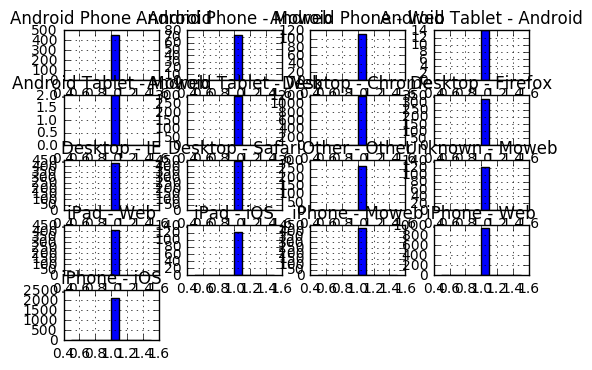

In [6]:
%matplotlib inline
#workdf.plot(subplots=True, kind="hist", bins=100)
#workdf['dim_device_app_combo'].astype(str).hist()
workdf['dim_device_app_combo'].apply(pd.value_counts).hist()
